In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.ensemble import IsolationForest

## Importing dataset

In [2]:
df_holidays_events = pd.read_csv('holidays_events.csv')
df_oil = pd.read_csv('oil.csv')
df_stores = pd.read_csv('stores.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv("test.csv")
df_transactions = pd.read_csv('transactions.csv')

## Visualizing all Dataframe at once

In [3]:
DF={"df_holidays_events":df_holidays_events,
    "df_oil"            :df_oil,
    "df_stores"         :df_stores,
    "df_train"          :df_train ,
    "df_test"           :df_test,
    "df_transactions"   :df_transactions
   }


In [4]:
for key in DF:
    print("********************************************************************")
    print(key)
    print("***************************")
    print(DF[key].head())
    print("********************************************************************")

********************************************************************
df_holidays_events
***************************
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
********************************************************************
********************************************************************
df_oil
***************************
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2

In [5]:
for key in DF:
    print("********************************************************************")
    print(key)
    print("***************************")
    print(DF[key].isnull().sum())
    print("********************************************************************")
    #As we can see that in df_oil ,there are 43 null values so it is important to fix null values before training the model

********************************************************************
df_holidays_events
***************************
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
********************************************************************
********************************************************************
df_oil
***************************
date           0
dcoilwtico    43
dtype: int64
********************************************************************
********************************************************************
df_stores
***************************
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
********************************************************************
********************************************************************
df_train
***************************
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: i

## Exploratory data analysis (EDA)

<AxesSubplot:>

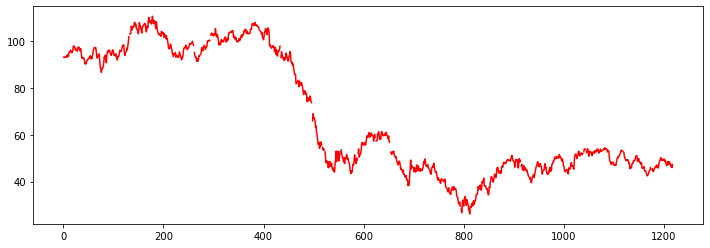

In [6]:
#lets visualize df_oil dataframe
import matplotlib.pyplot as plt
DF['df_oil']['dcoilwtico'].plot(figsize=(12,4),c='red')
#because of null data,curve is breaking at many points

In [7]:
DF['df_oil']['dcoilwtico'] = DF['df_oil']['dcoilwtico'].fillna(method='bfill')

<AxesSubplot:>

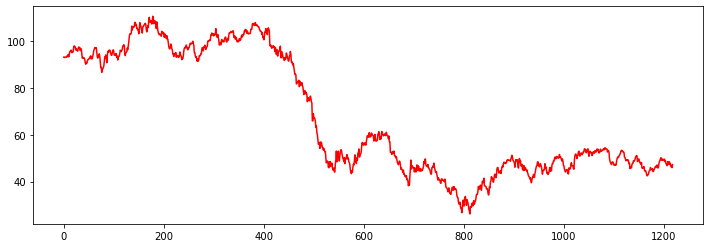

In [8]:
DF['df_oil']['dcoilwtico'].plot(figsize=(12,4),c='red')

In [9]:
df_holidays_events['isHoliday']=1
df_holidays_events.rename(columns={'type' : 'holidayType'}, inplace=True)
df_holidays_events = df_holidays_events[['date','isHoliday','holidayType']]

In [10]:
df_holidays_events

,date,isHoliday,holidayType
0,2012-03-02,1,Holiday
1,2012-04-01,1,Holiday
2,2012-04-12,1,Holiday
3,2012-04-14,1,Holiday
4,2012-04-21,1,Holiday
...,...,...,...
345,2017-12-22,1,Additional
346,2017-12-23,1,Additional
347,2017-12-24,1,Additional
348,2017-12-25,1,Holiday


In [11]:
df_train.drop('id', axis=1,inplace=True)
new_df1=pd.merge(df_train,df_holidays_events)#date column is common 

In [12]:
new_df1

,date,store_nbr,family,sales,onpromotion,isHoliday,holidayType
0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,Holiday
1,2013-01-01,1,BABY CARE,0.000,0,1,Holiday
2,2013-01-01,1,BEAUTY,0.000,0,1,Holiday
3,2013-01-01,1,BEVERAGES,0.000,0,1,Holiday
4,2013-01-01,1,BOOKS,0.000,0,1,Holiday
...,...,...,...,...,...,...,...
502519,2017-08-15,9,POULTRY,438.133,0,1,Holiday
502520,2017-08-15,9,PREPARED FOODS,154.553,1,1,Holiday
502521,2017-08-15,9,PRODUCE,2419.729,148,1,Holiday
502522,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,Holiday


In [13]:
new_df1.loc[new_df1['isHoliday'].isna(), 'holidayType'] = 'Not_holiday'
new_df1

,date,store_nbr,family,sales,onpromotion,isHoliday,holidayType
0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,Holiday
1,2013-01-01,1,BABY CARE,0.000,0,1,Holiday
2,2013-01-01,1,BEAUTY,0.000,0,1,Holiday
3,2013-01-01,1,BEVERAGES,0.000,0,1,Holiday
4,2013-01-01,1,BOOKS,0.000,0,1,Holiday
...,...,...,...,...,...,...,...
502519,2017-08-15,9,POULTRY,438.133,0,1,Holiday
502520,2017-08-15,9,PREPARED FOODS,154.553,1,1,Holiday
502521,2017-08-15,9,PRODUCE,2419.729,148,1,Holiday
502522,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,Holiday


In [14]:
new_df1.loc[new_df1['isHoliday'].isna(), 'isHoliday'] = 0

In [15]:
new_df1=pd.merge(new_df1,df_oil)#date column is common

In [16]:
new_df1

,date,store_nbr,family,sales,onpromotion,isHoliday,holidayType,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,Holiday,93.14
1,2013-01-01,1,BABY CARE,0.000,0,1,Holiday,93.14
2,2013-01-01,1,BEAUTY,0.000,0,1,Holiday,93.14
3,2013-01-01,1,BEVERAGES,0.000,0,1,Holiday,93.14
4,2013-01-01,1,BOOKS,0.000,0,1,Holiday,93.14
...,...,...,...,...,...,...,...,...
352831,2017-08-15,9,POULTRY,438.133,0,1,Holiday,47.57
352832,2017-08-15,9,PREPARED FOODS,154.553,1,1,Holiday,47.57
352833,2017-08-15,9,PRODUCE,2419.729,148,1,Holiday,47.57
352834,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,Holiday,47.57


In [17]:
new_df1.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
isHoliday      0
holidayType    0
dcoilwtico     0
dtype: int64

<AxesSubplot:>

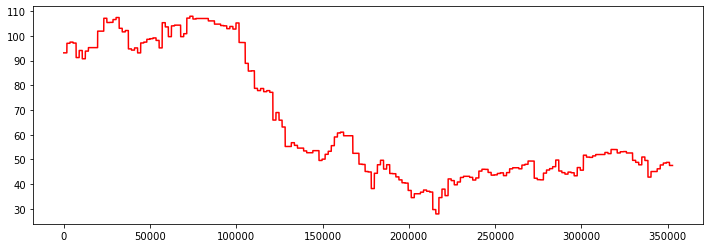

In [18]:
new_df1['dcoilwtico'].plot(figsize=(12,4),c='red')

In [19]:
group = new_df1.groupby('date')[['sales','dcoilwtico','isHoliday']].agg({'sales':'sum', 'dcoilwtico':'mean' , 'isHoliday':'max'})

In [20]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(group['sales'].values.reshape(-1,1))

IsolationForest(contamination=0.1, n_estimators=50)

In [21]:
group['anomaly'] = model.decision_function(group['sales'].values.reshape(-1,1))
group['anomaly'] = np.where( group['anomaly'] <0, 'outlier' , 'normal')

In [22]:
possible_outlier_days= group[group['anomaly']=='outlier'].index

In [23]:
new_df1=pd.merge(new_df1,df_stores ,left_on='store_nbr' ,right_on="store_nbr")

In [24]:
new_df1

,date,store_nbr,family,sales,onpromotion,isHoliday,holidayType,dcoilwtico,city,state,type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,Holiday,93.14,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.000,0,1,Holiday,93.14,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.000,0,1,Holiday,93.14,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.000,0,1,Holiday,93.14,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.000,0,1,Holiday,93.14,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...
352831,2017-08-15,9,POULTRY,438.133,0,1,Holiday,47.57,Quito,Pichincha,B,6
352832,2017-08-15,9,PREPARED FOODS,154.553,1,1,Holiday,47.57,Quito,Pichincha,B,6
352833,2017-08-15,9,PRODUCE,2419.729,148,1,Holiday,47.57,Quito,Pichincha,B,6
352834,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,Holiday,47.57,Quito,Pichincha,B,6


In [25]:
new_df1=pd.merge(new_df1,df_transactions)
new_df1

,date,store_nbr,family,sales,onpromotion,isHoliday,holidayType,dcoilwtico,city,state,type,cluster,transactions
0,2013-02-11,1,AUTOMOTIVE,0.000,0,1,Holiday,97.01,Quito,Pichincha,D,13,396
1,2013-02-11,1,BABY CARE,0.000,0,1,Holiday,97.01,Quito,Pichincha,D,13,396
2,2013-02-11,1,BEAUTY,0.000,0,1,Holiday,97.01,Quito,Pichincha,D,13,396
3,2013-02-11,1,BEVERAGES,172.000,0,1,Holiday,97.01,Quito,Pichincha,D,13,396
4,2013-02-11,1,BOOKS,0.000,0,1,Holiday,97.01,Quito,Pichincha,D,13,396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,2017-08-15,9,POULTRY,438.133,0,1,Holiday,47.57,Quito,Pichincha,B,6,2155
322043,2017-08-15,9,PREPARED FOODS,154.553,1,1,Holiday,47.57,Quito,Pichincha,B,6,2155
322044,2017-08-15,9,PRODUCE,2419.729,148,1,Holiday,47.57,Quito,Pichincha,B,6,2155
322045,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,Holiday,47.57,Quito,Pichincha,B,6,2155


In [26]:
new_df1.isnull().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
isHoliday       0
holidayType     0
dcoilwtico      0
city            0
state           0
type            0
cluster         0
transactions    0
dtype: int64

<AxesSubplot:>

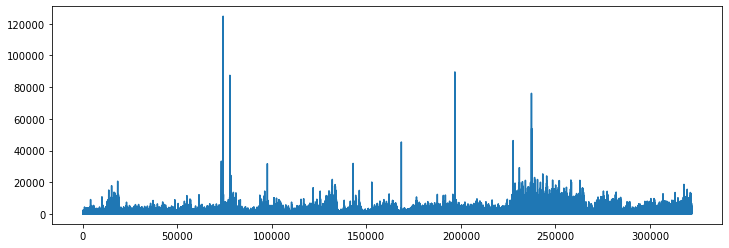

In [27]:
%matplotlib inline
new_df1['sales'].plot(figsize=(12,4))

In [28]:
dt=new_df1.reset_index()
dt= dt.set_index(pd.DatetimeIndex(dt['date']))

<AxesSubplot:xlabel='date'>

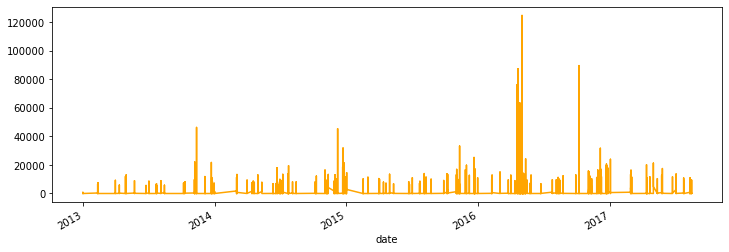

In [29]:
dt['sales'].plot(figsize=(12,4),c="orange")

<AxesSubplot:xlabel='date'>

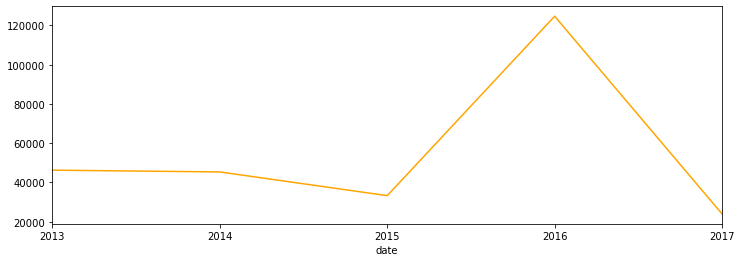

In [30]:
dt.resample(rule='A').max()['sales'].plot(figsize=(12,4),c="orange")
##year end frequency
# as we can see there is sudden peak in the year 2016

<AxesSubplot:xlabel='date'>

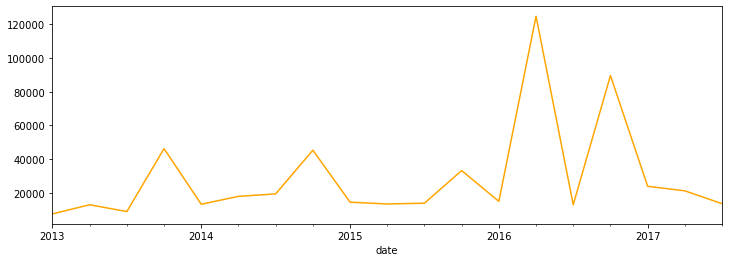

In [31]:
##quaterly start frequency
dt.resample(rule='QS').max()['sales'].plot(figsize=(12,4),c="orange")

## Sale spike in 2016 :
It could be due to a magnitude of 7.8 earthquake struck Ecuador on April 16, 2016. 

<AxesSubplot:xlabel='date'>

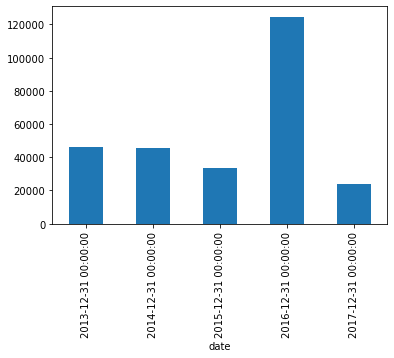

In [32]:
dt.resample(rule='A').max()['sales'].plot(kind='bar')

<AxesSubplot:xlabel='date'>

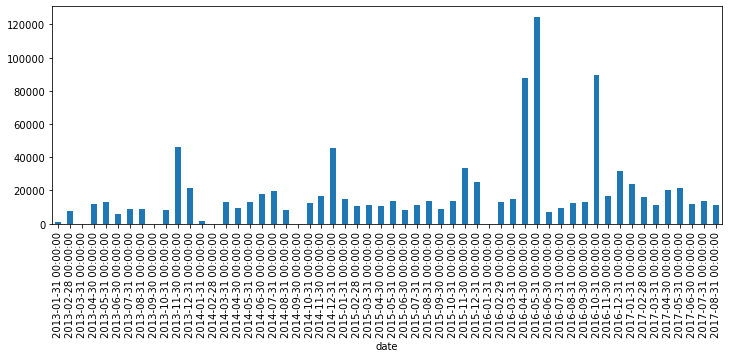

In [33]:
dt.resample(rule='M').max()['sales'].plot(kind="bar",figsize=(12,4))

In [34]:
dt.duplicated().sum()

0

In [35]:
new_df1.isnull().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
isHoliday       0
holidayType     0
dcoilwtico      0
city            0
state           0
type            0
cluster         0
transactions    0
dtype: int64

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
cor = new_df1.drop("isHoliday",axis=1).corr()
cor

,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions
store_nbr,1.000000,0.051349,0.025992,-0.010132,-0.075667,0.171946
sales,0.051349,1.000000,0.418029,-0.061509,0.033868,0.203691
onpromotion,0.025992,0.418029,1.000000,-0.133598,0.005895,0.038163
dcoilwtico,-0.010132,-0.061509,-0.133598,1.000000,0.021238,-0.016547
cluster,-0.075667,0.033868,0.005895,0.021238,1.000000,0.188876
transactions,0.171946,0.203691,0.038163,-0.016547,0.188876,1.000000


<Figure size 864x648 with 0 Axes>

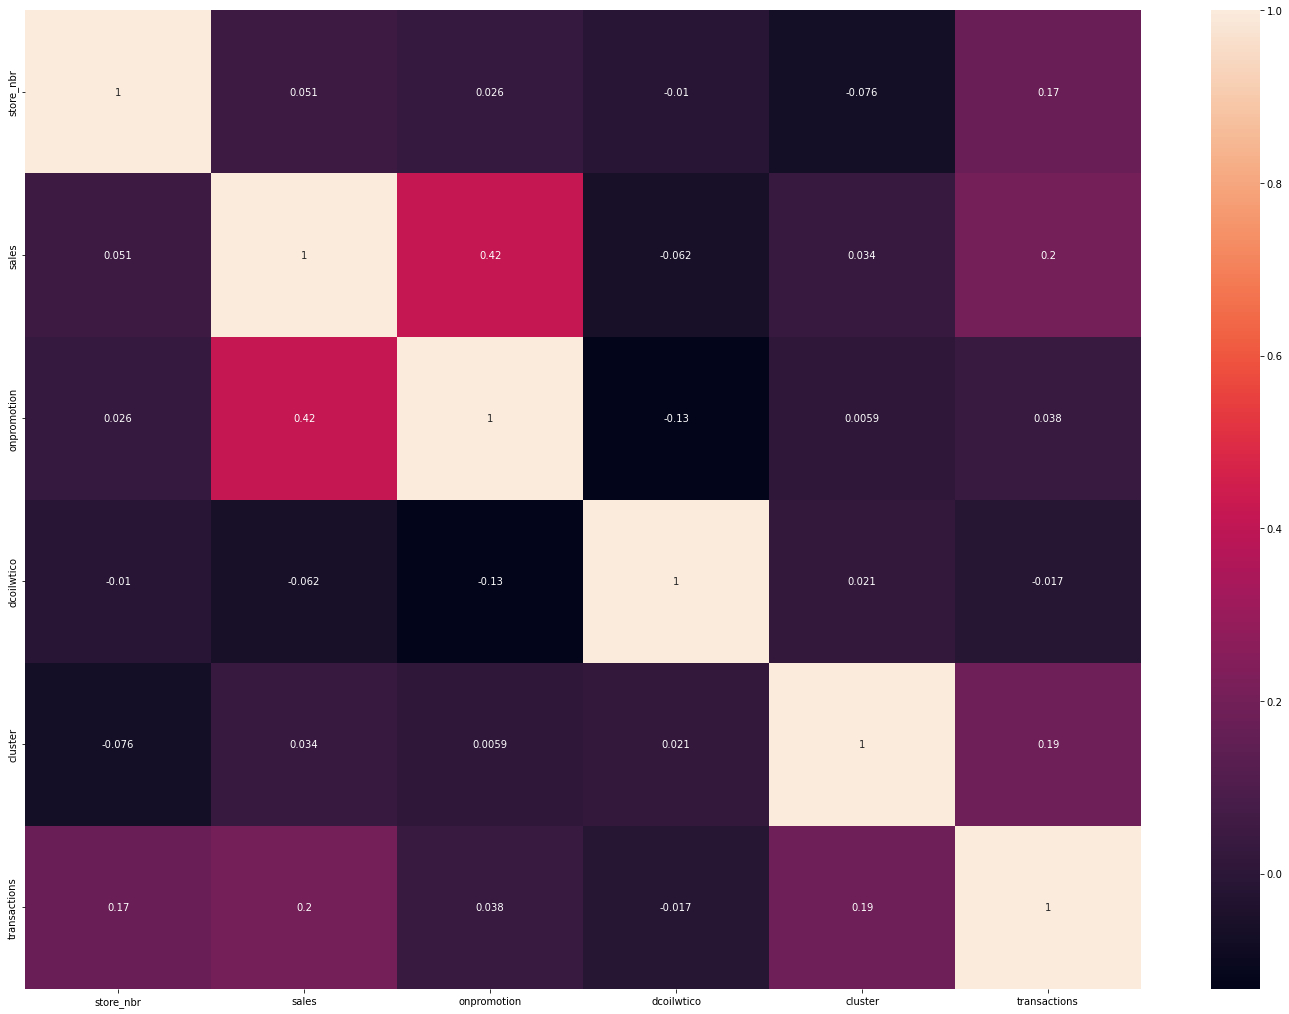

In [37]:
import seaborn as sns
plt.figure(figsize=(25, 18))
sns.heatmap(cor, annot = True)
plt.show()

## Insights:
1)Sales are correlated with onpromotions
2)Sales also correlated with transactions 
so i feel these two features must be present

In [38]:
new_df1

,date,store_nbr,family,sales,onpromotion,isHoliday,holidayType,dcoilwtico,city,state,type,cluster,transactions
0,2013-02-11,1,AUTOMOTIVE,0.000,0,1,Holiday,97.01,Quito,Pichincha,D,13,396
1,2013-02-11,1,BABY CARE,0.000,0,1,Holiday,97.01,Quito,Pichincha,D,13,396
2,2013-02-11,1,BEAUTY,0.000,0,1,Holiday,97.01,Quito,Pichincha,D,13,396
3,2013-02-11,1,BEVERAGES,172.000,0,1,Holiday,97.01,Quito,Pichincha,D,13,396
4,2013-02-11,1,BOOKS,0.000,0,1,Holiday,97.01,Quito,Pichincha,D,13,396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,2017-08-15,9,POULTRY,438.133,0,1,Holiday,47.57,Quito,Pichincha,B,6,2155
322043,2017-08-15,9,PREPARED FOODS,154.553,1,1,Holiday,47.57,Quito,Pichincha,B,6,2155
322044,2017-08-15,9,PRODUCE,2419.729,148,1,Holiday,47.57,Quito,Pichincha,B,6,2155
322045,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,Holiday,47.57,Quito,Pichincha,B,6,2155


## Taking care of categorical dataset using OrdinalEncoder and label Encoder

In [39]:
from sklearn.preprocessing import OrdinalEncoder

holidayType = OrdinalEncoder()
holidayType.fit(new_df1['holidayType'].values.reshape(-1,1))
new_df1['holidayType'] = holidayType.transform(new_df1['holidayType'].values.reshape(-1,1))

In [40]:
family = OrdinalEncoder()
family.fit(new_df1['family'].values.reshape(-1,1))
new_df1['family'] = family.transform(new_df1['family'].values.reshape(-1,1))

In [41]:
type_y={
    'D'  : 5,
    'C'  : 4,
    'A'  : 3,
    'B'  : 2,
    'E'  : 1
}

In [42]:
new_df1["type"]=new_df1["type"].map(type_y)

In [43]:
city = OrdinalEncoder()
city.fit(new_df1['city'].values.reshape(-1,1))
new_df1['city'] = city.transform(new_df1['city'].values.reshape(-1,1))

In [44]:
new_df1

,date,store_nbr,family,sales,onpromotion,isHoliday,holidayType,dcoilwtico,city,state,type,cluster,transactions
0,2013-02-11,1,0.0,0.000,0,1,3.0,97.01,18.0,Pichincha,5,13,396
1,2013-02-11,1,1.0,0.000,0,1,3.0,97.01,18.0,Pichincha,5,13,396
2,2013-02-11,1,2.0,0.000,0,1,3.0,97.01,18.0,Pichincha,5,13,396
3,2013-02-11,1,3.0,172.000,0,1,3.0,97.01,18.0,Pichincha,5,13,396
4,2013-02-11,1,4.0,0.000,0,1,3.0,97.01,18.0,Pichincha,5,13,396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,2017-08-15,9,28.0,438.133,0,1,3.0,47.57,18.0,Pichincha,2,6,2155
322043,2017-08-15,9,29.0,154.553,1,1,3.0,47.57,18.0,Pichincha,2,6,2155
322044,2017-08-15,9,30.0,2419.729,148,1,3.0,47.57,18.0,Pichincha,2,6,2155
322045,2017-08-15,9,31.0,121.000,8,1,3.0,47.57,18.0,Pichincha,2,6,2155


In [45]:
new_df1.drop("state",axis=1,inplace=True)

In [46]:
df = new_df1[~new_df1['date'].isin(possible_outlier_days)].copy()

In [47]:
#seperating target variable and input variables. As we already utilize date column info so we can drop it before splitting
df['date'] = pd.to_datetime(df['date'])
df['dayoftheWeek'] = df['date'].apply(lambda x: x.isoweekday())
df['month'] = df['date'].apply(lambda x: x.month)
y = df['sales'] 
df.drop(['sales','date'], axis=1, inplace=True)
x= df

In [48]:
df.isnull().sum()

store_nbr       0
family          0
onpromotion     0
isHoliday       0
holidayType     0
dcoilwtico      0
city            0
type            0
cluster         0
transactions    0
dayoftheWeek    0
month           0
dtype: int64

In [49]:
df

,store_nbr,family,onpromotion,isHoliday,holidayType,dcoilwtico,city,type,cluster,transactions,dayoftheWeek,month
33,1,0.0,0,1,3.0,97.48,18.0,5,13,487,2,2
34,1,1.0,0,1,3.0,97.48,18.0,5,13,487,2,2
35,1,2.0,0,1,3.0,97.48,18.0,5,13,487,2,2
36,1,3.0,0,1,3.0,97.48,18.0,5,13,487,2,2
37,1,4.0,0,1,3.0,97.48,18.0,5,13,487,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
322042,9,28.0,0,1,3.0,47.57,18.0,2,6,2155,2,8
322043,9,29.0,1,1,3.0,47.57,18.0,2,6,2155,2,8
322044,9,30.0,148,1,3.0,47.57,18.0,2,6,2155,2,8
322045,9,31.0,8,1,3.0,47.57,18.0,2,6,2155,2,8


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [51]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(n_estimators = 20)
RandomForest.fit(X_train,y_train)


RandomForestRegressor(n_estimators=20)

In [52]:
RandomForest.score(X_test,y_test)

0.9287747702151717

In [53]:
df_holidays_events

,date,isHoliday,holidayType
0,2012-03-02,1,Holiday
1,2012-04-01,1,Holiday
2,2012-04-12,1,Holiday
3,2012-04-14,1,Holiday
4,2012-04-21,1,Holiday
...,...,...,...
345,2017-12-22,1,Additional
346,2017-12-23,1,Additional
347,2017-12-24,1,Additional
348,2017-12-25,1,Holiday


In [54]:
df_test

,id,date,store_nbr,family,onpromotion
0,3000888,8/16/2017,1,AUTOMOTIVE,0
1,3000889,8/16/2017,1,BABY CARE,0
2,3000890,8/16/2017,1,BEAUTY,2
3,3000891,8/16/2017,1,BEVERAGES,20
4,3000892,8/16/2017,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,8/31/2017,9,POULTRY,1
28508,3029396,8/31/2017,9,PREPARED FOODS,0
28509,3029397,8/31/2017,9,PRODUCE,1
28510,3029398,8/31/2017,9,SCHOOL AND OFFICE SUPPLIES,9


In [55]:
df_train

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [56]:
id_= df_test['id'].astype(str).copy()#converting into string and saving it in id col.

In [57]:
df_test.drop('id', axis=1,inplace=True)

In [58]:
new_df2 = pd.merge(df_test, df_holidays_events, on='date', how='left')

In [59]:
new_df2

,date,store_nbr,family,onpromotion,isHoliday,holidayType
0,8/16/2017,1,AUTOMOTIVE,0,NaN,NaN
1,8/16/2017,1,BABY CARE,0,NaN,NaN
2,8/16/2017,1,BEAUTY,2,NaN,NaN
3,8/16/2017,1,BEVERAGES,20,NaN,NaN
4,8/16/2017,1,BOOKS,0,NaN,NaN
...,...,...,...,...,...,...
28507,8/31/2017,9,POULTRY,1,NaN,NaN
28508,8/31/2017,9,PREPARED FOODS,0,NaN,NaN
28509,8/31/2017,9,PRODUCE,1,NaN,NaN
28510,8/31/2017,9,SCHOOL AND OFFICE SUPPLIES,9,NaN,NaN


In [60]:
new_df2.loc[new_df2['isHoliday'].isna(), 'holidayType'] = 'Not_holiday'

In [61]:
new_df2.loc[new_df2['isHoliday'].isna(), 'isHoliday'] = 0

In [62]:
new_df2

,date,store_nbr,family,onpromotion,isHoliday,holidayType
0,8/16/2017,1,AUTOMOTIVE,0,0.0,Not_holiday
1,8/16/2017,1,BABY CARE,0,0.0,Not_holiday
2,8/16/2017,1,BEAUTY,2,0.0,Not_holiday
3,8/16/2017,1,BEVERAGES,20,0.0,Not_holiday
4,8/16/2017,1,BOOKS,0,0.0,Not_holiday
...,...,...,...,...,...,...
28507,8/31/2017,9,POULTRY,1,0.0,Not_holiday
28508,8/31/2017,9,PREPARED FOODS,0,0.0,Not_holiday
28509,8/31/2017,9,PRODUCE,1,0.0,Not_holiday
28510,8/31/2017,9,SCHOOL AND OFFICE SUPPLIES,9,0.0,Not_holiday


In [63]:
new_df2 = pd.merge(new_df2, df_oil, on='date', how='left')

In [64]:
new_df2

,date,store_nbr,family,onpromotion,isHoliday,holidayType,dcoilwtico
0,8/16/2017,1,AUTOMOTIVE,0,0.0,Not_holiday,NaN
1,8/16/2017,1,BABY CARE,0,0.0,Not_holiday,NaN
2,8/16/2017,1,BEAUTY,2,0.0,Not_holiday,NaN
3,8/16/2017,1,BEVERAGES,20,0.0,Not_holiday,NaN
4,8/16/2017,1,BOOKS,0,0.0,Not_holiday,NaN
...,...,...,...,...,...,...,...
28507,8/31/2017,9,POULTRY,1,0.0,Not_holiday,NaN
28508,8/31/2017,9,PREPARED FOODS,0,0.0,Not_holiday,NaN
28509,8/31/2017,9,PRODUCE,1,0.0,Not_holiday,NaN
28510,8/31/2017,9,SCHOOL AND OFFICE SUPPLIES,9,0.0,Not_holiday,NaN


In [65]:
new_df2["dcoilwtico"].fillna(value=df_oil['dcoilwtico'].mean(),inplace=True)
''''
as we saw in heat man , dcoilwtico is an important feature but
absent in test set so i opted a strategy to fill the respected column 
with mean of dcoilwtico from df_oil dataframe

'''

"'\nas we saw in heat man , dcoilwtico is an important feature but\nabsent in test set so i opted a strategy to fill the respected column \nwith mean of dcoilwtico from df_oil dataframe\n\n"

In [66]:
new_df2

,date,store_nbr,family,onpromotion,isHoliday,holidayType,dcoilwtico
0,8/16/2017,1,AUTOMOTIVE,0,0.0,Not_holiday,67.673325
1,8/16/2017,1,BABY CARE,0,0.0,Not_holiday,67.673325
2,8/16/2017,1,BEAUTY,2,0.0,Not_holiday,67.673325
3,8/16/2017,1,BEVERAGES,20,0.0,Not_holiday,67.673325
4,8/16/2017,1,BOOKS,0,0.0,Not_holiday,67.673325
...,...,...,...,...,...,...,...
28507,8/31/2017,9,POULTRY,1,0.0,Not_holiday,67.673325
28508,8/31/2017,9,PREPARED FOODS,0,0.0,Not_holiday,67.673325
28509,8/31/2017,9,PRODUCE,1,0.0,Not_holiday,67.673325
28510,8/31/2017,9,SCHOOL AND OFFICE SUPPLIES,9,0.0,Not_holiday,67.673325


In [67]:
new_df2 = pd.merge(new_df2, df_stores, on='store_nbr', how='left')

In [68]:
new_df2=pd.merge(new_df2,df_transactions,on=['store_nbr','date'], how='left')

In [69]:
new_df2

,date,store_nbr,family,onpromotion,isHoliday,holidayType,dcoilwtico,city,state,type,cluster,transactions
0,8/16/2017,1,AUTOMOTIVE,0,0.0,Not_holiday,67.673325,Quito,Pichincha,D,13,NaN
1,8/16/2017,1,BABY CARE,0,0.0,Not_holiday,67.673325,Quito,Pichincha,D,13,NaN
2,8/16/2017,1,BEAUTY,2,0.0,Not_holiday,67.673325,Quito,Pichincha,D,13,NaN
3,8/16/2017,1,BEVERAGES,20,0.0,Not_holiday,67.673325,Quito,Pichincha,D,13,NaN
4,8/16/2017,1,BOOKS,0,0.0,Not_holiday,67.673325,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
28507,8/31/2017,9,POULTRY,1,0.0,Not_holiday,67.673325,Quito,Pichincha,B,6,NaN
28508,8/31/2017,9,PREPARED FOODS,0,0.0,Not_holiday,67.673325,Quito,Pichincha,B,6,NaN
28509,8/31/2017,9,PRODUCE,1,0.0,Not_holiday,67.673325,Quito,Pichincha,B,6,NaN
28510,8/31/2017,9,SCHOOL AND OFFICE SUPPLIES,9,0.0,Not_holiday,67.673325,Quito,Pichincha,B,6,NaN


In [70]:
new_df2.isnull().sum()

date                0
store_nbr           0
family              0
onpromotion         0
isHoliday           0
holidayType         0
dcoilwtico          0
city                0
state               0
type                0
cluster             0
transactions    28512
dtype: int64

In [71]:
new_df2["transactions"].fillna(value=df_transactions["transactions"].mean(),inplace=True)
''' 
same strategy opted for transaction column

'''

' \nsame strategy opted for transaction column\n\n'

In [72]:
holidayType = OrdinalEncoder()
holidayType.fit(new_df2['holidayType'].values.reshape(-1,1))
new_df2['holidayType'] = holidayType.transform(new_df2['holidayType'].values.reshape(-1,1))

In [73]:
city = OrdinalEncoder()
city.fit(new_df2['city'].values.reshape(-1,1))
new_df2['city'] = city.transform(new_df2['city'].values.reshape(-1,1))

In [74]:
new_df2.drop("state",axis=1,inplace=True)

In [75]:
new_df2

,date,store_nbr,family,onpromotion,isHoliday,holidayType,dcoilwtico,city,type,cluster,transactions
0,8/16/2017,1,AUTOMOTIVE,0,0.0,0.0,67.673325,18.0,D,13,1694.602158
1,8/16/2017,1,BABY CARE,0,0.0,0.0,67.673325,18.0,D,13,1694.602158
2,8/16/2017,1,BEAUTY,2,0.0,0.0,67.673325,18.0,D,13,1694.602158
3,8/16/2017,1,BEVERAGES,20,0.0,0.0,67.673325,18.0,D,13,1694.602158
4,8/16/2017,1,BOOKS,0,0.0,0.0,67.673325,18.0,D,13,1694.602158
...,...,...,...,...,...,...,...,...,...,...,...
28507,8/31/2017,9,POULTRY,1,0.0,0.0,67.673325,18.0,B,6,1694.602158
28508,8/31/2017,9,PREPARED FOODS,0,0.0,0.0,67.673325,18.0,B,6,1694.602158
28509,8/31/2017,9,PRODUCE,1,0.0,0.0,67.673325,18.0,B,6,1694.602158
28510,8/31/2017,9,SCHOOL AND OFFICE SUPPLIES,9,0.0,0.0,67.673325,18.0,B,6,1694.602158


In [76]:
family = OrdinalEncoder()
family.fit(new_df2['family'].values.reshape(-1,1))
new_df2['family'] = family.transform(new_df2['family'].values.reshape(-1,1))

In [77]:
type_y={
    'D'  : 5,
    'C'  : 4,
    'A'  : 3,
    'B'  : 2,
    'E'  : 1
}

In [78]:
new_df2["type"]=new_df2["type"].map(type_y)

In [79]:
new_df2

,date,store_nbr,family,onpromotion,isHoliday,holidayType,dcoilwtico,city,type,cluster,transactions
0,8/16/2017,1,0.0,0,0.0,0.0,67.673325,18.0,5,13,1694.602158
1,8/16/2017,1,1.0,0,0.0,0.0,67.673325,18.0,5,13,1694.602158
2,8/16/2017,1,2.0,2,0.0,0.0,67.673325,18.0,5,13,1694.602158
3,8/16/2017,1,3.0,20,0.0,0.0,67.673325,18.0,5,13,1694.602158
4,8/16/2017,1,4.0,0,0.0,0.0,67.673325,18.0,5,13,1694.602158
...,...,...,...,...,...,...,...,...,...,...,...
28507,8/31/2017,9,28.0,1,0.0,0.0,67.673325,18.0,2,6,1694.602158
28508,8/31/2017,9,29.0,0,0.0,0.0,67.673325,18.0,2,6,1694.602158
28509,8/31/2017,9,30.0,1,0.0,0.0,67.673325,18.0,2,6,1694.602158
28510,8/31/2017,9,31.0,9,0.0,0.0,67.673325,18.0,2,6,1694.602158


In [80]:
new_df2['date'] = pd.to_datetime(new_df2['date'])
new_df2['dayoftheWeek'] = new_df2['date'].apply(lambda x: x.isoweekday())
new_df2['month'] = new_df2['date'].apply(lambda x: x.month)

In [81]:
new_df2

,date,store_nbr,family,onpromotion,isHoliday,holidayType,dcoilwtico,city,type,cluster,transactions,dayoftheWeek,month
0,2017-08-16,1,0.0,0,0.0,0.0,67.673325,18.0,5,13,1694.602158,3,8
1,2017-08-16,1,1.0,0,0.0,0.0,67.673325,18.0,5,13,1694.602158,3,8
2,2017-08-16,1,2.0,2,0.0,0.0,67.673325,18.0,5,13,1694.602158,3,8
3,2017-08-16,1,3.0,20,0.0,0.0,67.673325,18.0,5,13,1694.602158,3,8
4,2017-08-16,1,4.0,0,0.0,0.0,67.673325,18.0,5,13,1694.602158,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,9,28.0,1,0.0,0.0,67.673325,18.0,2,6,1694.602158,4,8
28508,2017-08-31,9,29.0,0,0.0,0.0,67.673325,18.0,2,6,1694.602158,4,8
28509,2017-08-31,9,30.0,1,0.0,0.0,67.673325,18.0,2,6,1694.602158,4,8
28510,2017-08-31,9,31.0,9,0.0,0.0,67.673325,18.0,2,6,1694.602158,4,8


## Forecasting sales

In [82]:
forecasting_sales = RandomForest.predict(new_df2.drop('date',axis=1))

In [83]:
new_df2['sales']  = forecasting_sales
new_df2['id'] = id_

In [84]:
new_df2[['id','sales']].set_index('id').to_csv('submission_asignment_final.csv')

In [85]:
new_df2

,date,store_nbr,family,onpromotion,isHoliday,holidayType,dcoilwtico,city,type,cluster,transactions,dayoftheWeek,month,sales,id
0,2017-08-16,1,0.0,0,0.0,0.0,67.673325,18.0,5,13,1694.602158,3,8,3.500000,3000888
1,2017-08-16,1,1.0,0,0.0,0.0,67.673325,18.0,5,13,1694.602158,3,8,0.000000,3000889
2,2017-08-16,1,2.0,2,0.0,0.0,67.673325,18.0,5,13,1694.602158,3,8,6.500000,3000890
3,2017-08-16,1,3.0,20,0.0,0.0,67.673325,18.0,5,13,1694.602158,3,8,2404.400000,3000891
4,2017-08-16,1,4.0,0,0.0,0.0,67.673325,18.0,5,13,1694.602158,3,8,0.000000,3000892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,9,28.0,1,0.0,0.0,67.673325,18.0,2,6,1694.602158,4,8,329.405048,3029395
28508,2017-08-31,9,29.0,0,0.0,0.0,67.673325,18.0,2,6,1694.602158,4,8,69.474000,3029396
28509,2017-08-31,9,30.0,1,0.0,0.0,67.673325,18.0,2,6,1694.602158,4,8,1080.193300,3029397
28510,2017-08-31,9,31.0,9,0.0,0.0,67.673325,18.0,2,6,1694.602158,4,8,120.202150,3029398


## Conclusion:
1)I trained the model using Deep learning neural network ,but it was taking so much time to train as hyperparameter tuning was needed so due to training time being too much i dropped .

2)Best models for regression problems are decision tree and Random forest 

3)I tried with decision tree but getting less accuracy due to overfit,Pruning process large Optimization unguaranteed,Complex calculations.

4)Decision tree has low bais and high variance when created to its max depth but as Random forest work on bagging technique and it takes output from multiple decision tree so the average output with respect to random forest has low bais and low variance .This the reason i believe why i prefered random forest over decision tree.